<a href="https://colab.research.google.com/github/kantsubodh/docker-demo/blob/master/DL_Assignment_set1_problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import os
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop
from tensorflow.keras import regularizers


print(tf.__version__)

2.7.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# split training set into training set and validation set using train_test_split provided by scikit-learn 
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=77)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Label: {}'.format(class_names[train_labels[img]]))
    plt.tight_layout()
    plt.show()

In [5]:
#plotImages(train_images#)

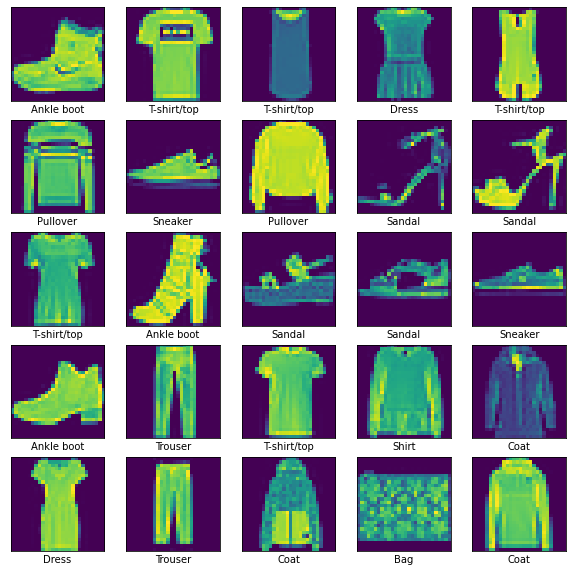

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

BEFORE: Rotaion Range 



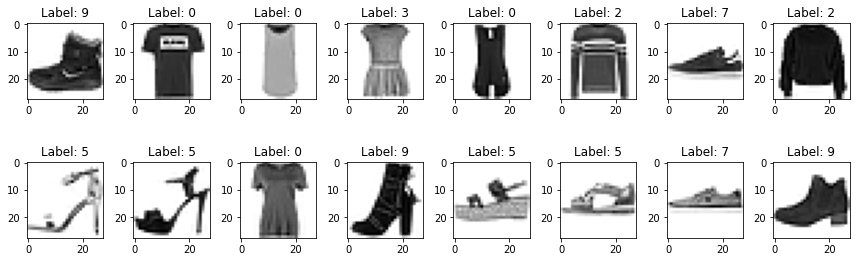

AFTER: Rotaion Range 



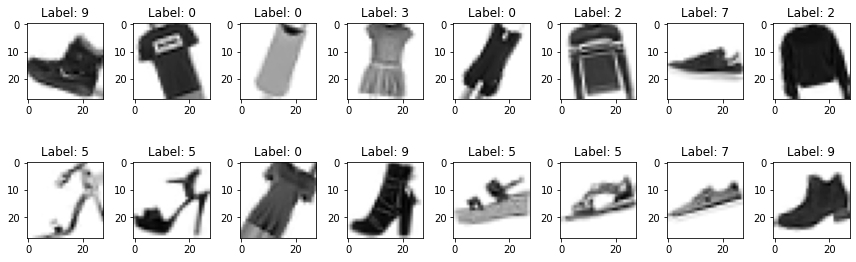

In [7]:
# specify the maximum rotation_range angle
rotation_range_val = 30
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val)
# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE: Rotaion Range \n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER: Rotaion Range \n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1), 
                         train_labels.reshape(train_labels.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

BEFORE: Height Shift Range 



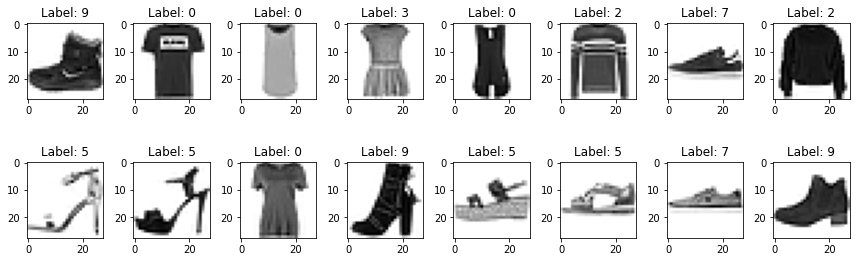

AFTER: Height Shift Range



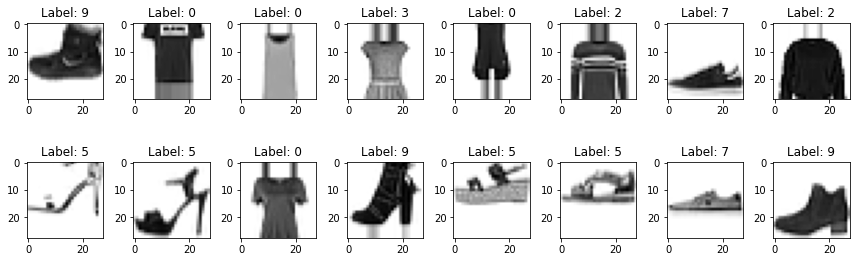

In [8]:
# specify the width and height shift arguments
width_shift_val = 0.25
height_shift_val = 0.25

# import relevant library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create the class object
datagen = ImageDataGenerator(height_shift_range=height_shift_val)

# fit the generator
datagen.fit(train_images.reshape(train_images.shape[0], 28, 28, 1))

# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col

# plot before
print('BEFORE: Height Shift Range \n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes1[i//num_col, i%num_col]
    ax.imshow(train_images[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(train_labels[i]))
plt.tight_layout()
plt.show()

# plot after
print('AFTER: Height Shift Range\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(train_images.reshape(train_images.shape[0], 28, 28, 1), 
                         train_labels.reshape(train_labels.shape[0], 1), 
                         batch_size=num, 
                         shuffle=False):
    for i in range(0, num):
        ax = axes2[i//num_col, i%num_col]
        ax.imshow(X[i].reshape(28,28), cmap='gray_r')
        ax.set_title('Label: {}'.format(int(Y[i])))
    break
plt.tight_layout()
plt.show()

In [9]:
print("Training Data length and size",train_images.shape)
print("Training Data Output",train_labels)
print("Testing Data Length and size",test_images.shape)

Training Data length and size (60000, 28, 28)
Training Data Output [9 0 0 ... 3 0 5]
Testing Data Length and size (10000, 28, 28)


In [10]:
x_train = x_train / 255.0
x_val = x_val / 255.0
test_images = test_images / 255.0
print("Training Data Length and size",x_train.shape)
print("Validation Data Length and size",x_val.shape)
print("Testing Data Length and size",test_images.shape)

Training Data Length and size (45000, 28, 28)
Validation Data Length and size (15000, 28, 28)
Testing Data Length and size (10000, 28, 28)


In [11]:
adam = Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(learning_rate=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(learning_rate=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(learning_rate=0.01,epsilon=None,decay=0.0)
adamax = Adamax(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(learning_rate=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(learning_rate=0.001,rho=0.9,epsilon=None,decay=0.0)

loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

metrics = ['accuracy','precision','recall']

In [12]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))  # This function flattens the input data

model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.3))   # Add a dropout layer with 0.3 probability
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation='softmax'))   # The number of units in the last layer should always be the number of classes in which we have to classify our input data.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                6

In [13]:
model.compile(optimizer=adam, loss=loss[0], metrics=metrics[0])

In [14]:
batch_size = 1500
epochs = 50

history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_val, y_val))  # You can set verbose to 1 to get the status of your model training, 2 to get one line per epoch, here I kept it 0 to keep the notebook precise. 
 
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/50
30/30 - 4s - loss: 4.6988 - accuracy: 0.3579 - val_loss: 2.3127 - val_accuracy: 0.4872 - 4s/epoch - 147ms/step
Epoch 2/50
30/30 - 0s - loss: 1.9661 - accuracy: 0.5540 - val_loss: 1.9487 - val_accuracy: 0.5668 - 375ms/epoch - 13ms/step
Epoch 3/50
30/30 - 0s - loss: 1.5324 - accuracy: 0.6456 - val_loss: 1.3005 - val_accuracy: 0.6833 - 369ms/epoch - 12ms/step
Epoch 4/50
30/30 - 0s - loss: 1.1944 - accuracy: 0.7019 - val_loss: 1.0925 - val_accuracy: 0.7433 - 421ms/epoch - 14ms/step
Epoch 5/50
30/30 - 0s - loss: 1.1960 - accuracy: 0.7058 - val_loss: 1.0691 - val_accuracy: 0.7257 - 357ms/epoch - 12ms/step
Epoch 6/50
30/30 - 0s - loss: 1.0815 - accuracy: 0.7252 - val_loss: 1.0840 - val_accuracy: 0.7376 - 398ms/epoch - 13ms/step
Epoch 7/50
30/30 - 1s - loss: 1.0146 - accuracy: 0.7495 - val_loss: 1.0126 - val_accuracy: 0.7521 - 554ms/epoch - 18ms/step
Epoch 8/50
30/30 - 0s - loss: 1.0702 - accuracy: 0.7359 - val_loss: 0.9459 - val_accuracy: 0.7357 - 404ms/epoch - 13ms/step
Epoch 9/50

In [15]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

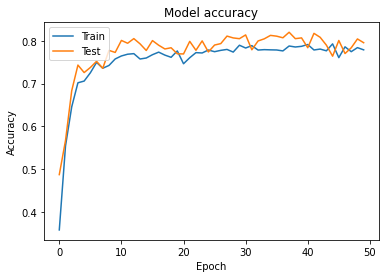

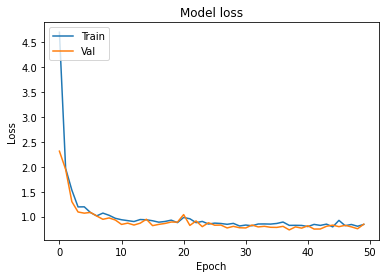

In [16]:
plot_history(history)